# Modelling

## This notebook contains a code to create the Keras CNN model pulling data with Keras ImageDataGenerator. 

In [5]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator


In [3]:
# load numpy array from npy file
train_folder = '/content/drive/MyDrive/FinalProjectNatalia/skin_2cl/training/'
val_folder = '/content/drive/MyDrive/FinalProjectNatalia/skin_2cl/validation/'
test_folder = '/content/drive/MyDrive/FinalProjectNatalia/skin_2cl/test/'

In [65]:
# Create generator. The data is not augmented as the dataset already contains some augmentations.
datagen = ImageDataGenerator(rescale = 1./255)

# Prepare an iterator for each dataset

train_it = datagen.flow_from_directory(
    train_folder, 
    class_mode='categorical', 
    shuffle=True,
    target_size=(120,120))

val_it = datagen.flow_from_directory(
    val_folder, 
    class_mode='categorical',
    shuffle=True,
    target_size=(120, 120))


# Confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 6090 images belonging to 2 classes.
Found 1219 images belonging to 2 classes.
Batch shape=(32, 120, 120, 3), min=0.000, max=1.000


In [66]:
#Getting label shape
for image_batch, label_batch in train_it:
    break
    image_batch.shape, label_batch.shape

In [6]:
#Build the model
model = Sequential()

model.add(Input (shape = (120, 120, 3)))
#Convolution block 1
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
model.add (MaxPool2D((2,2)))
model.add (Dropout (0.5))
#Convolution block 2
model.add (Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
model.add (Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
model.add (MaxPool2D((2,2)))
#Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(2, activation="softmax")) #use categorical classification with 2 classes as it works better than binary 

In [68]:
#Compile the model
model.compile(optimizer= keras.optimizers.Adam(0.0001, decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [69]:
#Add callbacks to save the best model during training

from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

red_lr= ReduceLROnPlateau(monitor='val_acc',patience=5,verbose=1,factor=0.7)
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 10)
cb_checkpointer = ModelCheckpoint(filepath = '/content/drive/MyDrive/FinalProjectNatalia/best_CNN_Datagen_2cl_categ.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [70]:
#Fit the model

batch_size = 64
epochs = 30
history_cnn= model.fit_generator(train_it,
                       validation_data = val_it,
                       epochs = epochs,
                      callbacks=[cb_checkpointer, cb_early_stopper])
                        

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
191/191 [==============================] - 75s 390ms/step - loss: 0.4419 - acc: 0.7824 - val_loss: 0.4233 - val_acc: 0.8195
Epoch 2/30
191/191 [==============================] - 75s 390ms/step - loss: 0.3682 - acc: 0.8320 - val_loss: 0.3573 - val_acc: 0.8335
Epoch 3/30
191/191 [==============================] - 75s 390ms/step - loss: 0.3327 - acc: 0.8447 - val_loss: 0.3049 - val_acc: 0.8359
Epoch 4/30
191/191 [==============================] - 75s 389ms/step - loss: 0.3182 - acc: 0.8465 - val_loss: 0.2833 - val_acc: 0.8409
Epoch 5/30
191/191 [==============================] - 75s 391ms/step - loss: 0.3057 - acc: 0.8502 - val_loss: 0.2628 - val_acc: 0.8433
Epoch 6/30
191/191 [==============================] - 75s 389ms/step - loss: 0.2937 - acc: 0.8563 - val_loss: 0.2637 - val_acc: 0.8450
Epoch 7/30
191/191 [==============================] - 74s 386ms/step - loss: 0.2918 - acc: 0.8601 - val_loss: 0.2678 - val_acc: 0.8507
Epoch 8/30
191/191 [==============================] - 7

In [20]:
# best_cnn_model = keras.models.load_model("/content/drive/MyDrive/FinalProjectNatalia/best_CNN_Datagen_2cl.hdf5")

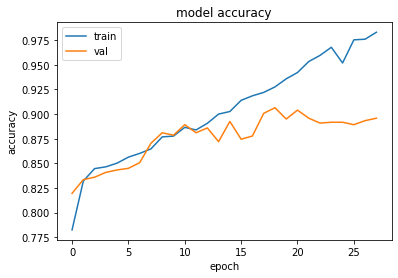

In [71]:
#Plot the train and validation accuracy over epochs

import matplotlib.pyplot as plt

plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [72]:
test_it_all_cnn=datagen.flow_from_directory(test_folder, batch_size=32, target_size=(120,120), shuffle=False, class_mode='categorical')

Found 812 images belonging to 2 classes.


In [73]:
y_pred_all_cnn = model.predict_generator(test_it_all_cnn)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [55]:
test_it_all_cnn.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [74]:
#Predicted labels for the whole test set
predicted_ids_all_cnn = np.argmax(y_pred_all_cnn, axis=-1)
#predicted_labels_all_cnn = dataset_labels[predicted_ids_all_cnn]

In [75]:
from sklearn.metrics import confusion_matrix
cm_cnn = confusion_matrix(test_it_all_cnn.classes, predicted_ids_all_cnn)
cm_cnn

array([[452,  44],
       [ 28, 288]])

In [76]:
# Print f1, precision, and recall scores
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

print(precision_score(test_it_all_cnn.classes, predicted_ids_all_cnn, average="macro"))
print(recall_score(test_it_all_cnn.classes, predicted_ids_all_cnn, average="macro"))
print(f1_score(test_it_all_cnn.classes, predicted_ids_all_cnn, average="macro"))

0.9045682730923694
0.9113413638219681
0.9075591985428051


In [77]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im

from keras.preprocessing import image



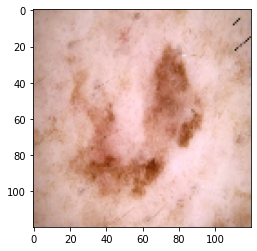

(1, 120, 120, 3)


In [78]:
img_path = '/content/drive/MyDrive/FinalProjectNatalia/skin/test/0_actinic_keratosis/ISIC_0025411.jpg'
img = image.load_img(img_path, target_size=(120, 120))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [79]:
# predicting images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = model.predict_classes(images, batch_size=10)
predict_image=best_cnn_model.predict(images) 
classes=np.argmax(predict_image,axis=1)
print("Predicted class is:",classes)


Predicted class is: [0]


In [ ]:
from keras import models
layer_outputs = [layer.output for layer in best_cnn_model.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=best_cnn_model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [ ]:
activations = activation_model.predict(img_tensor) 
# Returns a list of five Numpy arrays: one array per layer activation

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 120, 120, 256)


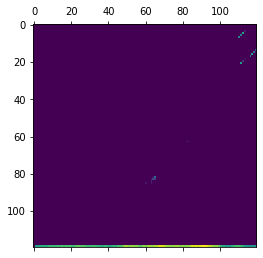

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 127], cmap='viridis')

In [ ]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
images_per_row = 16  


In [ ]:
images_per_row = 16

In [ ]:
display_grid.shape

(120, 240)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


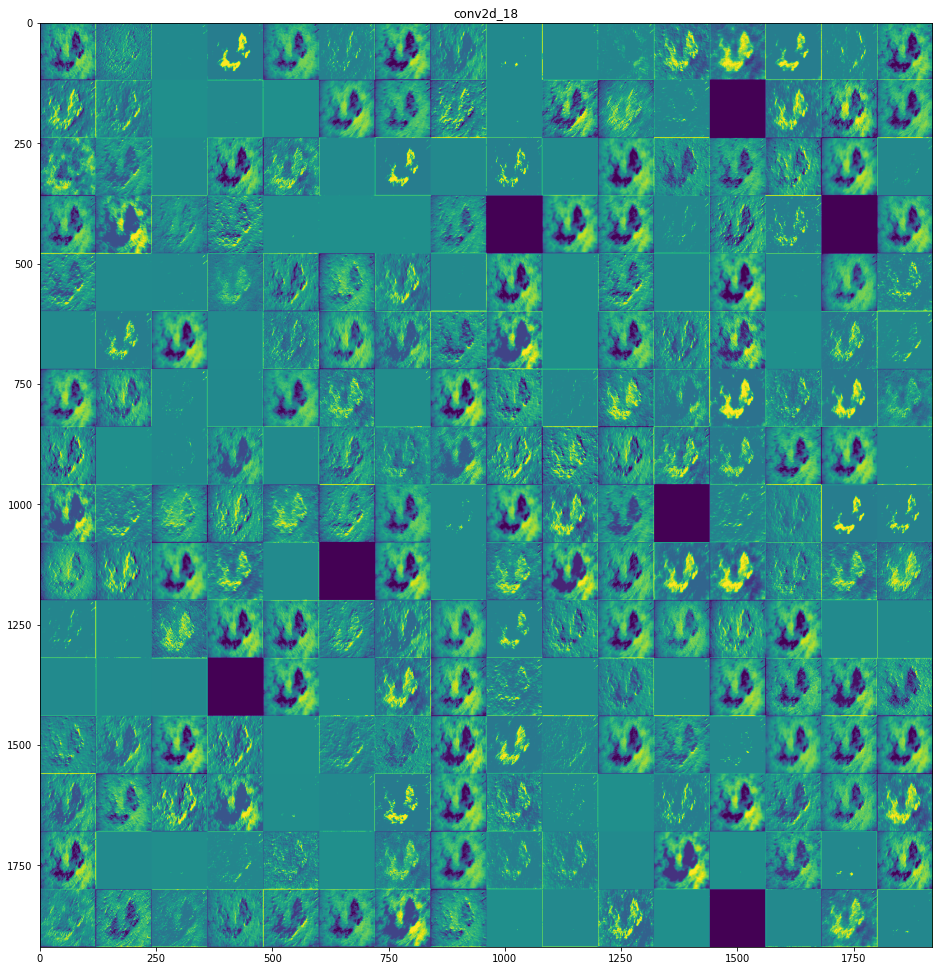

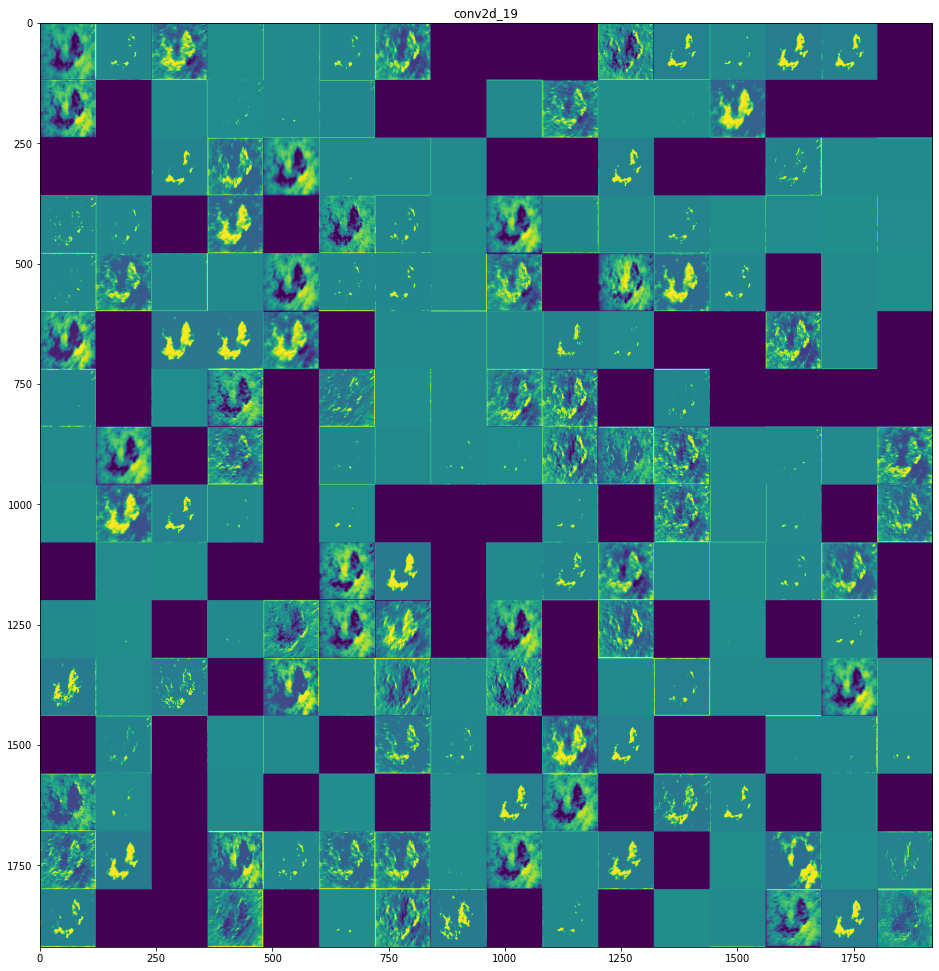

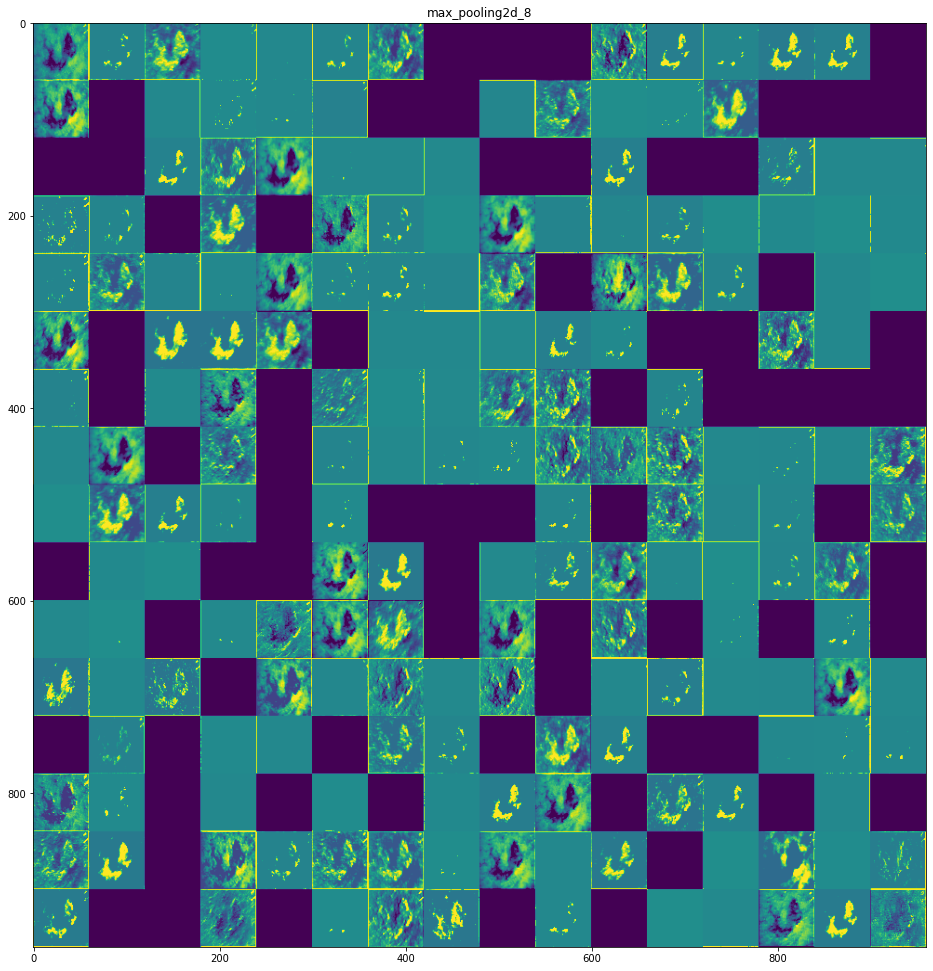

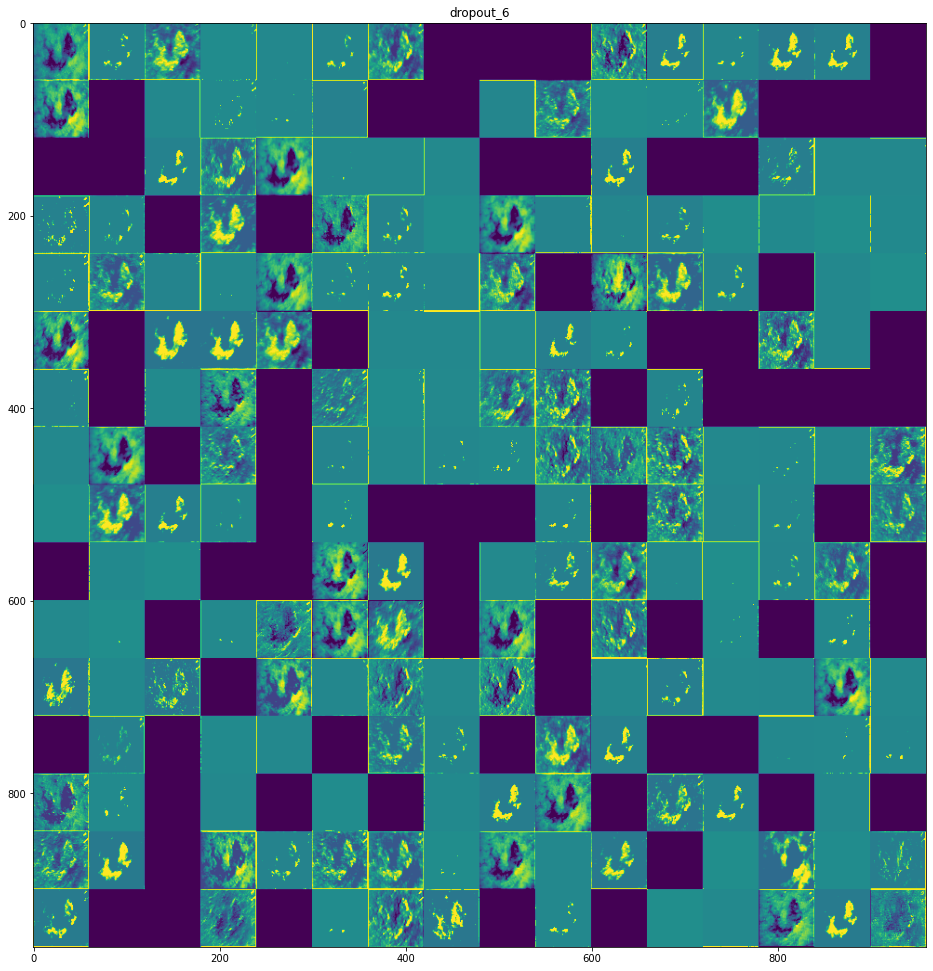

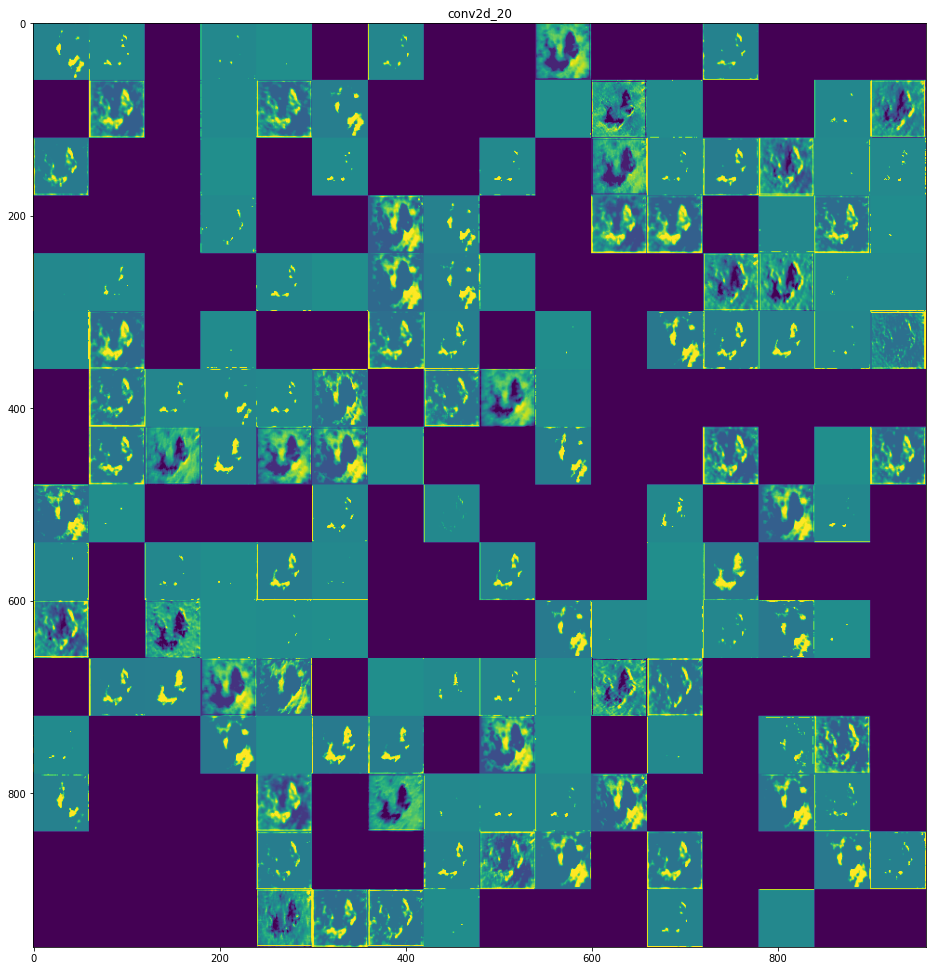

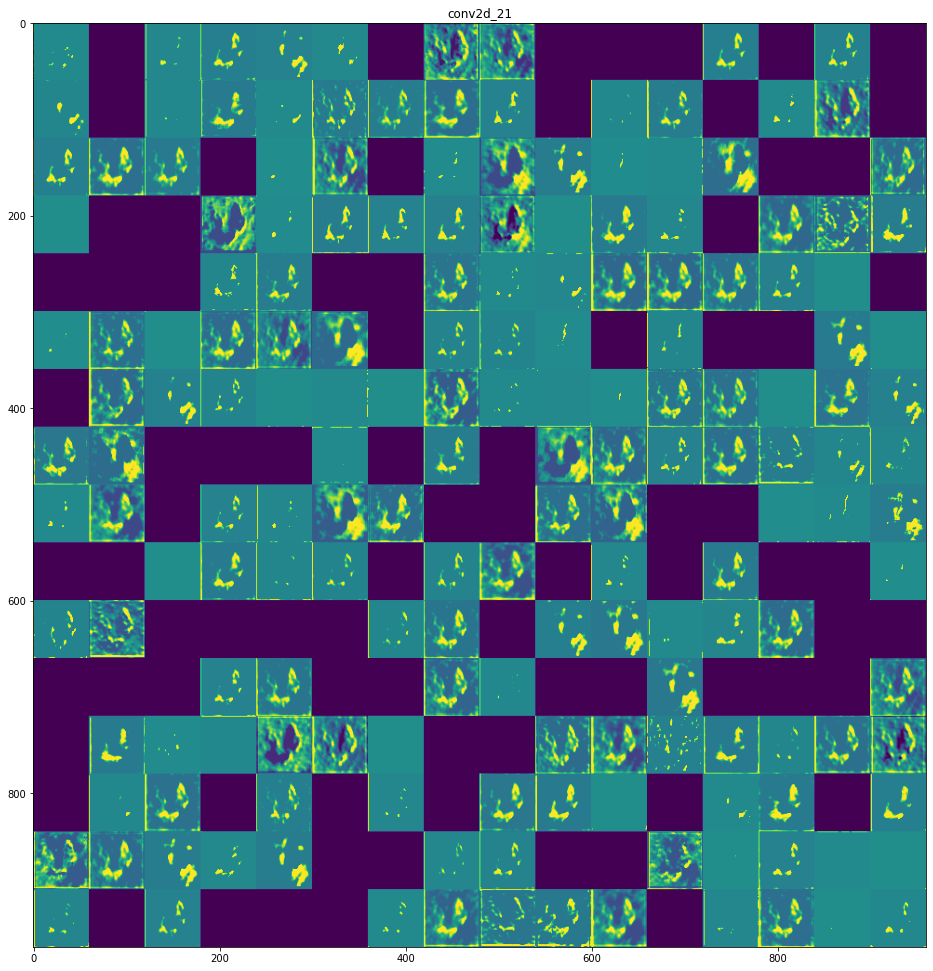

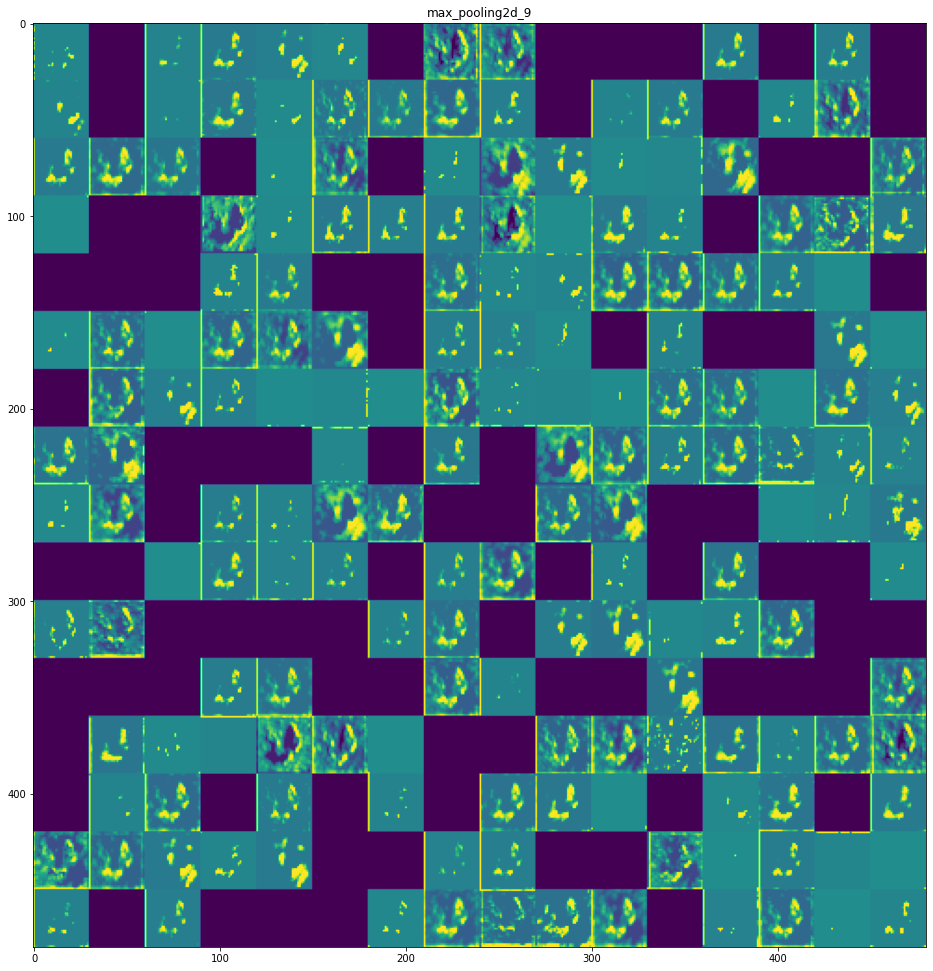

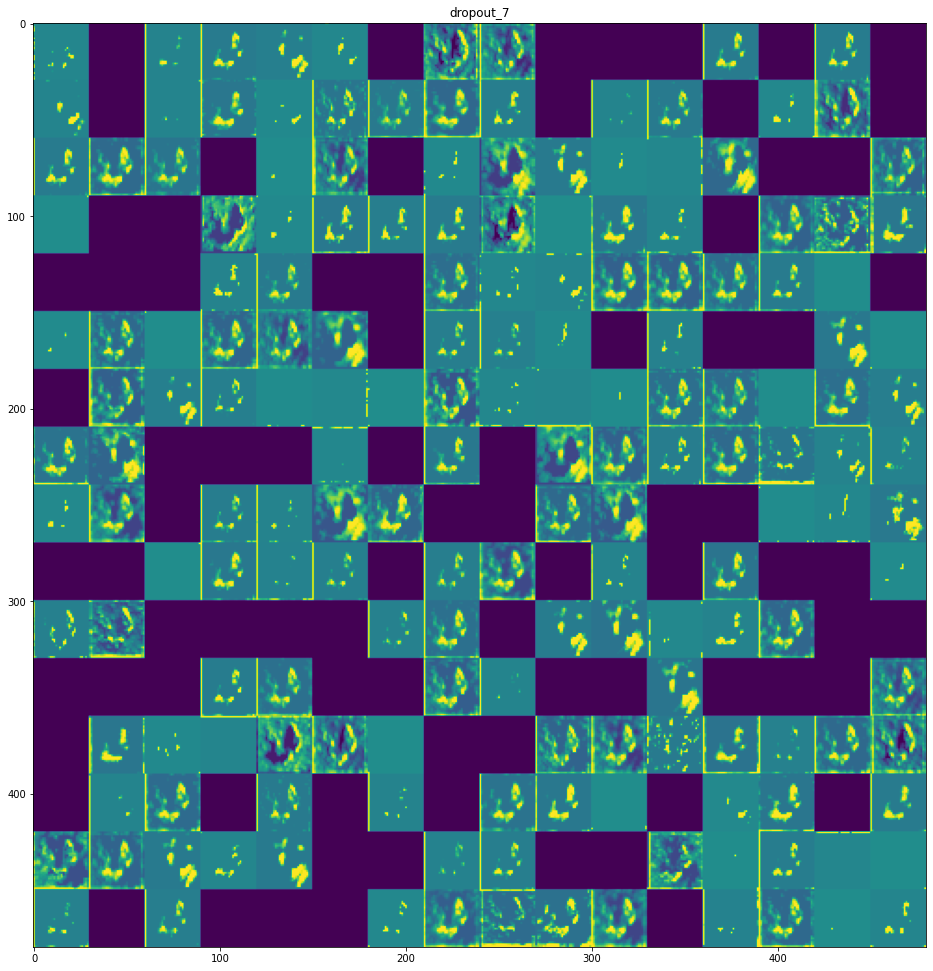

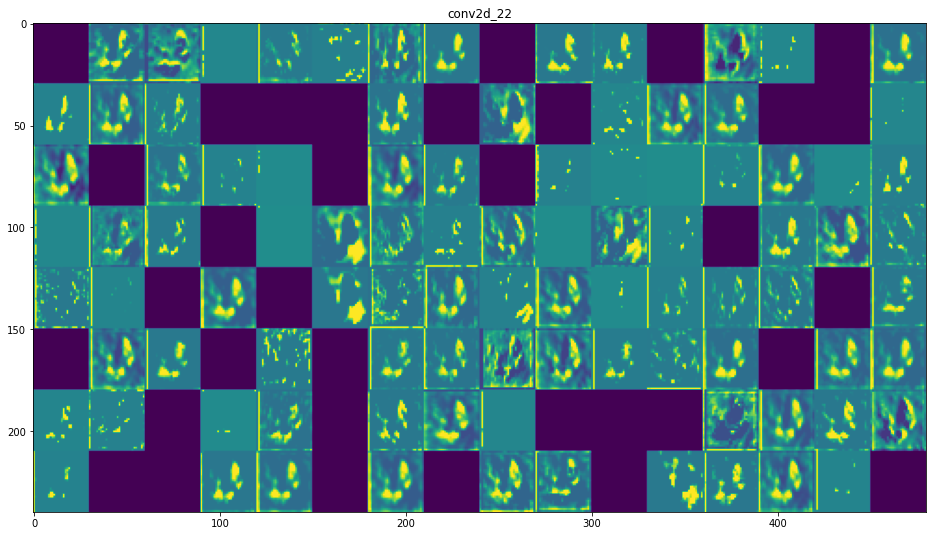

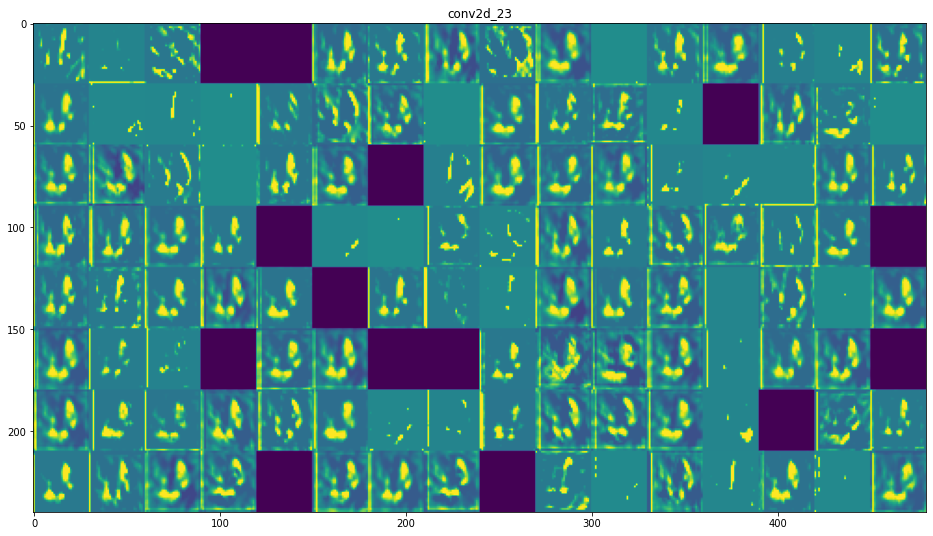

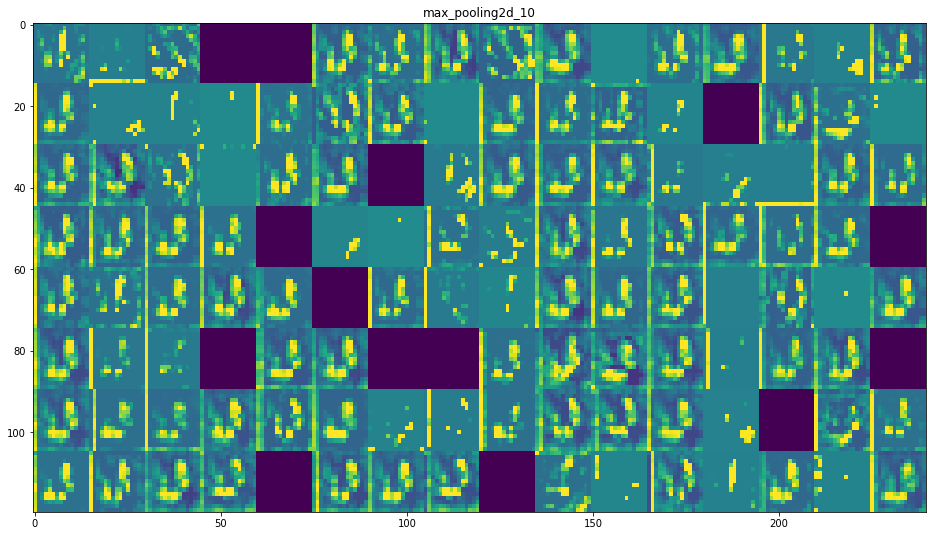

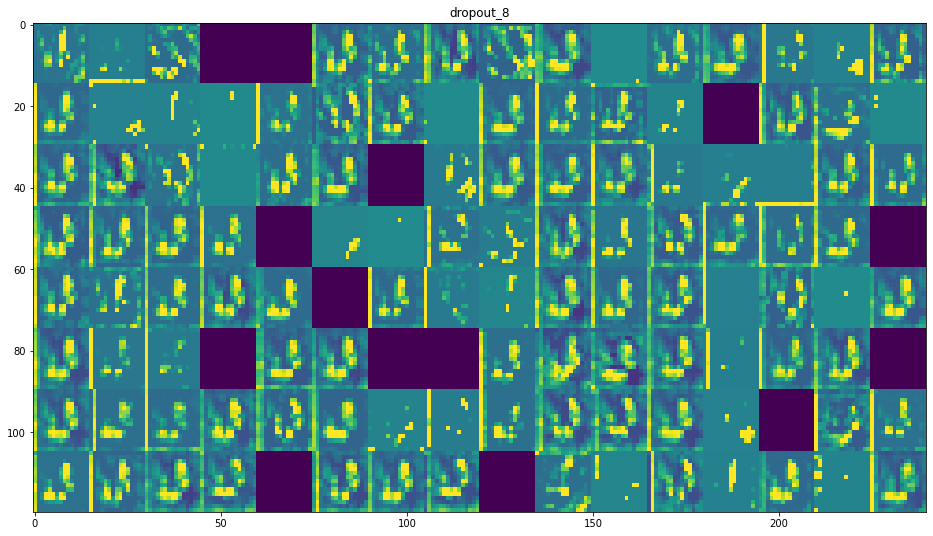

In [ ]:
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]+1))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')